In [1]:
import torch

In [2]:
torch.manual_seed(0)

e = torch.rand(4,8,10)

# Show as a sample the first element
e[0]

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
         0.6323],
        [0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000, 0.1610,
         0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362, 0.1852,
         0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298, 0.7231,
         0.7423],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783,
         0.4820],
        [0.8198, 0.9971, 0.6984, 0.5675, 0.8352, 0.2056, 0.5932, 0.1123, 0.1535,
         0.2417],
        [0.7262, 0.7011, 0.2038, 0.6511, 0.7745, 0.4369, 0.5191, 0.6159, 0.8102,
         0.9801],
        [0.1147, 0.3168, 0.6965, 0.9143, 0.9351, 0.9412, 0.5995, 0.0652, 0.5460,
         0.1872]])

In [3]:
a = e[:,::2,:]
a[0]

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
         0.6323],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362, 0.1852,
         0.3734],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783,
         0.4820],
        [0.7262, 0.7011, 0.2038, 0.6511, 0.7745, 0.4369, 0.5191, 0.6159, 0.8102,
         0.9801]])

In [4]:
b = e[:,1::2,:]
b[0]

tensor([[0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000, 0.1610,
         0.2823],
        [0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298, 0.7231,
         0.7423],
        [0.8198, 0.9971, 0.6984, 0.5675, 0.8352, 0.2056, 0.5932, 0.1123, 0.1535,
         0.2417],
        [0.1147, 0.3168, 0.6965, 0.9143, 0.9351, 0.9412, 0.5995, 0.0652, 0.5460,
         0.1872]])

In [5]:
torch.cat([a,b], dim=2)[0]

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
         0.6323, 0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000,
         0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362, 0.1852,
         0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298,
         0.7231, 0.7423],
        [0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783,
         0.4820, 0.8198, 0.9971, 0.6984, 0.5675, 0.8352, 0.2056, 0.5932, 0.1123,
         0.1535, 0.2417],
        [0.7262, 0.7011, 0.2038, 0.6511, 0.7745, 0.4369, 0.5191, 0.6159, 0.8102,
         0.9801, 0.1147, 0.3168, 0.6965, 0.9143, 0.9351, 0.9412, 0.5995, 0.0652,
         0.5460, 0.1872]])

In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
words = open("data/karpathy/names.txt", "r").read().splitlines()
print(f"We have a total of: {len(words)} names")
print(f"Some of them are: {words[:8]}")

We have a total of: 32033 names
Some of them are: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


In [8]:
# Now we build the ix to name and name to ix dicts
names_w_token = ['.'+name+'.' for name in words]
uniques_tokens = list(set(list(''.join(names_w_token))))

sorted_tokens = sorted(uniques_tokens)

itos = {ix:token for ix, token in enumerate(sorted_tokens)}
stoi = {token:ix for ix, token in enumerate(sorted_tokens)}
print(itos.items())
print(stoi.items())

vocab_size = len(stoi.keys())

dict_items([(0, '.'), (1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e'), (6, 'f'), (7, 'g'), (8, 'h'), (9, 'i'), (10, 'j'), (11, 'k'), (12, 'l'), (13, 'm'), (14, 'n'), (15, 'o'), (16, 'p'), (17, 'q'), (18, 'r'), (19, 's'), (20, 't'), (21, 'u'), (22, 'v'), (23, 'w'), (24, 'x'), (25, 'y'), (26, 'z')])
dict_items([('.', 0), ('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26)])


## Dataset building

In [9]:
import random
random.seed(42)
random.shuffle(words)

In [10]:
BLOCK_SIZE = 3

def build_dataset(words):
  """
  This function get a list of words and
  return two pytorch tensors X, Y:
  * X.shape -> (, 3)
  * X.shape -> ()
  """
  X, Y = [], []

  for word in words:
    context = [0]*BLOCK_SIZE
    for char in word+'.':
      ix = stoi[char]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  return torch.tensor(X), torch.tensor(Y)


n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

print(f"Training split: X.shape -> {Xtr.shape},  Y.shape -> {Ytr.shape}")
print(f"Dev/Val split: X.shape -> {Xdev.shape},  Y.shape -> {Ydev.shape}")
print(f"Test split: X.shape -> {Xte.shape},  Y.shape -> {Yte.shape}")

Training split: X.shape -> torch.Size([182625, 3]),  Y.shape -> torch.Size([182625])
Dev/Val split: X.shape -> torch.Size([22655, 3]),  Y.shape -> torch.Size([22655])
Test split: X.shape -> torch.Size([22866, 3]),  Y.shape -> torch.Size([22866])


In [11]:
# Now we will print some of this examples
for x, y in zip(Xtr[:20], Ytr[:20]):
  print(' '.join([itos[ch.item()] for ch in x]), '---->',itos[y.item()])

. . . ----> y
. . y ----> u
. y u ----> h
y u h ----> e
u h e ----> n
h e n ----> g
e n g ----> .
. . . ----> d
. . d ----> i
. d i ----> o
d i o ----> n
i o n ----> d
o n d ----> r
n d r ----> e
d r e ----> .
. . . ----> x
. . x ----> a
. x a ----> v
x a v ----> i
a v i ----> e


In [12]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.rand((fan_in, fan_out)) / fan_in**0.5
    self.bias = torch.rand((fan_out)) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias

    return self.out

  def parameters(self):
    return [self.weight] + ([self.bias] if self.bias is not None else [])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # Parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # Buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    if self.training:
      xmean = x.mean(0, keepdim=True)
      xvar = x.var(0, keepdim=True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    x_hat = (x-xmean) / (xvar + self.eps)**0.5
    self.out = self.gamma*x_hat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1-self.momentum)*self.running_mean + self.momentum*xmean
        self.running_var = (1-self.momentum)*self.running_var + self.momentum*xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]


class Tanh:

  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []

In [13]:
torch.manual_seed(42);

In [14]:
n_embd = 10
n_hidden = 200

C = torch.randn((vocab_size, n_embd))
layers = [
    Linear(BLOCK_SIZE*n_embd, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
]

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  layers[-1].weight *= 0.1

parameters = [C] + [parameter for layer in layers for parameter in layer.parameters()]

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([30, 200])
torch.Size([200])
torch.Size([200])
torch.Size([200, 27])
torch.Size([27])
Total number of parameters: 12097


In [15]:
max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
  b_ixs = torch.randint(low=0, high=Xtr.shape[0], size=(batch_size,))
  Xb, Yb = Xtr[b_ixs], Ytr[b_ixs]

  emb = C[Xb]
  x = emb.view(emb.shape[0], -1)

  for layer in layers:
    x = layer(x)

  # this last x represent the logits
  loss = F.cross_entropy(x, Yb)

  lossi.append(loss.item())

  for p in parameters:
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 150_000 else 0.01
  for p in parameters:
    p.data -= lr * p.grad

  if i % 10000 == 0:
    print(loss.item())

3.449802875518799
2.2550649642944336
2.4409914016723633
1.7914807796478271
2.06173038482666
1.937146782875061
1.7198586463928223
2.2758617401123047
2.3771402835845947
2.13818097114563
1.9984614849090576
1.9785149097442627
2.1672844886779785
2.277738332748413
2.1450555324554443
1.640193223953247
2.1014487743377686
2.2247252464294434
1.7819923162460327
2.0528838634490967


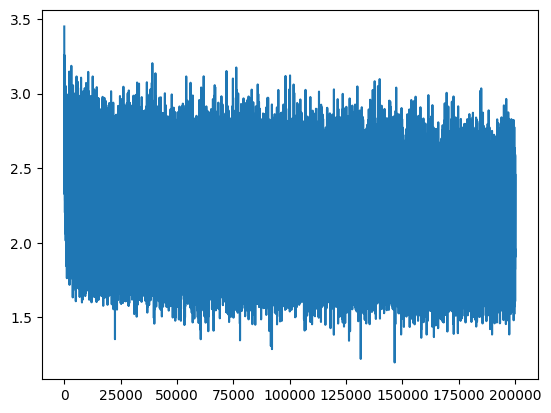

In [16]:
plt.plot(lossi)

In [17]:
# We should put the Batchnorm layer in inference mode
for layer in layers:
  layer.training = False

In [18]:
@torch.no_grad()
def split_loss(split):
  x, y = {
      'train': (Xtr, Ytr),
      'val': (Xdev, Ydev),
      'test': (Xte, Yte)
  }[split]

  emb = C[x]
  x = emb.view(emb.shape[0], -1)

  for layer in layers:
    x = layer(x)

  # this last x represent the logits
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.056511878967285
val 2.104665994644165


In [19]:
# Generate 20 names
for _ in range(20):
  out = []
  context = [0] * BLOCK_SIZE

  next_ch = ''

  while next_ch != '.':
    emb = C[context]
    x = emb.view(-1, BLOCK_SIZE*n_embd)

    for layer in layers:
      x = layer(x)

    probs = F.softmax(x, dim=1)
    next_ch_ix = torch.multinomial(probs, 1).item()
    next_ch = itos[next_ch_ix]
    out.append(next_ch)

    context = context[1:] + [next_ch_ix]

  name = ''.join(out)
  print(name)

zani.
haylian.
franayah.
ayvo.
rein.
jastiegon.
caqiania.
braydenthira.
liza.
jah.
grancealynna.
jamaurito.
faraj.
tori.
makyia.
cer.
tyre.
dia.
becrydeer.
rei.


The first new thing that we are going to do in this notebook, because all the previous work can be find in the previous notebooks, is to remove the noise in the loss plot. This noise is due to the small batch size, because of this the neural network can not genralize correctly between batches and we can see that while in general terms the loss is improving there is a lot of back-and-forth between steps.

So lets average the loss, spliting it on 200 groups of 1000 consecutives loss each one and we will calculate the average of each one of these groups so we can plot 200 loss (averaged) points.

Its very interesting the fact of how the loss decrease once we have reaced a plateau in loss value with `lr=0.1` and then we choose `lr=0.01`

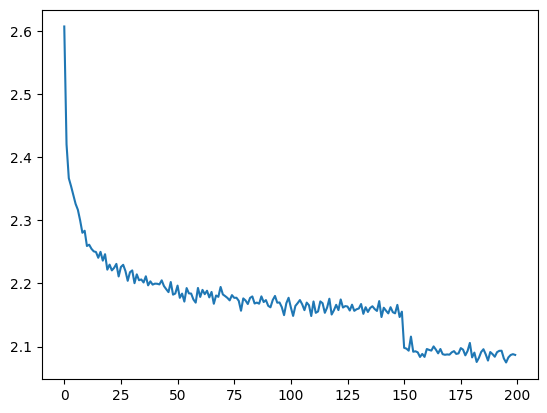

In [20]:
mean_losses = torch.tensor(lossi).view(200, -1).mean(1)
plt.plot(mean_losses)

There is a lot of ways to improve our model not just in accuracy but also in efficiency and code style.

Lets start with one improvement that will let us make all the forward pass in the same loop. Right now we have the forward pass divided in several step:
* First we calculate the Output of `C` (Embedding operation)
* Then we flatten the ouput with the `view` method (Flatten operation)
* Finally we use a `for` loop to make the rest of the forward pass

```
emb = C[Xb]
x = emb.view(emb.shape[0], -1)

for layer in layers:
  x = layer(x)
```

Lets create a couple of modules that will take care of Embeding and Flatten operations:

In [21]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.rand((fan_in, fan_out)) / fan_in**0.5
    self.bias = torch.rand((fan_out)) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias

    return self.out

  def parameters(self):
    return [self.weight] + ([self.bias] if self.bias is not None else [])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # Parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # Buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    if self.training:
      xmean = x.mean(0, keepdim=True)
      xvar = x.var(0, keepdim=True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    x_hat = (x-xmean) / (xvar + self.eps)**0.5
    self.out = self.gamma*x_hat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1-self.momentum)*self.running_mean + self.momentum*xmean
        self.running_var = (1-self.momentum)*self.running_var + self.momentum*xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]


class Tanh:

  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []


class Embedding:

  def __init__(self, num_embeddings, embedding_dims):
    # Here we do the same that we do when instatiate C
    # * num_embeddings: unique elements in vocab (ie. vocab_size)
    # * embedding_dims: embeding's dimension
    self.weight = torch.rand((num_embeddings, embedding_dims))

  def __call__(self, IX):
    # IX should be a tensor of indexes, that get the desired elements (rows)
    # from the weights (embeddings) matrix
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]


class Flatten:

  def __call__(self, x):
    '''
    This function transform a 3D tensor in a 2D tensor, where the first
    dimension is the number of samples in batch and the second is all the
    embeddings for this sample concatenated
    '''
    self.out = x.view(x.shape[0], -1)
    return self.out

  def parameters(self):
    return []

In [22]:
torch.manual_seed(42);

In [23]:
n_embd = 10
n_hidden = 200

layers = [
    Embedding(vocab_size, n_embd), Flatten(),
    Linear(BLOCK_SIZE*n_embd, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
]

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  layers[-1].weight *= 0.1

parameters = [parameter for layer in layers for parameter in layer.parameters()]

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([30, 200])
torch.Size([200])
torch.Size([200])
torch.Size([200, 27])
torch.Size([27])
Total number of parameters: 12097


In [24]:
max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
  b_ixs = torch.randint(low=0, high=Xtr.shape[0], size=(batch_size,))
  Xb, Yb = Xtr[b_ixs], Ytr[b_ixs]

  x = Xb
  for layer in layers:
    x = layer(x)

  # this last x represent the logits
  loss = F.cross_entropy(x, Yb)

  lossi.append(loss.item())

  for p in parameters:
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 150_000 else 0.01
  for p in parameters:
    p.data -= lr * p.grad

  if i % 10000 == 0:
    print(loss.item())

3.338150978088379
2.130017042160034
2.4473726749420166
2.2294514179229736
2.1728994846343994
2.196035623550415
1.982403039932251
2.0287282466888428
2.516113758087158
1.7846648693084717
2.123499631881714
1.8604204654693604
2.1439528465270996
2.26536226272583
2.2348382472991943
1.8540691137313843
2.0574252605438232
2.211724042892456
2.020636558532715
2.3416895866394043


As we have seen we have simplified a lot our forward pass. But we can simplify them even more using the torch Containers. We are interested in a special class of containers called `Sequential`.

A sequential container maintains a list of layers and when we need to do a forward pass (in training or inference) we just need to pass the input one time to the sequential object avoiding in this way the necesity of a loop.

Lets implement this sequential class by our own:

In [25]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.rand((fan_in, fan_out)) / fan_in**0.5
    self.bias = torch.rand((fan_out)) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias

    return self.out

  def parameters(self):
    return [self.weight] + ([self.bias] if self.bias is not None else [])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # Parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # Buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    if self.training:
      xmean = x.mean(0, keepdim=True)
      xvar = x.var(0, keepdim=True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    x_hat = (x-xmean) / (xvar + self.eps)**0.5
    self.out = self.gamma*x_hat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1-self.momentum)*self.running_mean + self.momentum*xmean
        self.running_var = (1-self.momentum)*self.running_var + self.momentum*xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]


class Tanh:

  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []


class Embedding:

  def __init__(self, num_embeddings, embedding_dims):
    # Here we do the same that we do when instatiate C
    # * num_embeddings: unique elements in vocab (ie. vocab_size)
    # * embedding_dims: embeding's dimension
    self.weight = torch.rand((num_embeddings, embedding_dims))

  def __call__(self, IX):
    # IX should be a tensor of indexes, that get the desired elements (rows)
    # from the weights (embeddings) matrix
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]


class Flatten:

  def __call__(self, x):
    '''
    This function transform a 3D tensor in a 2D tensor, where the first
    dimension is the number of samples in batch and the second is all the
    embeddings for this sample concatenated
    '''
    self.out = x.view(x.shape[0], -1)
    return self.out

  def parameters(self):
    return []


class Sequential:

  def __init__(self, layers):
    # layers is the list of layers
    self.layers = layers

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)

    self.out = x
    return self.out

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [26]:
torch.manual_seed(42);

In [27]:
n_embd = 10
n_hidden = 200

model = Sequential([
    Embedding(vocab_size, n_embd), Flatten(),
    Linear(BLOCK_SIZE*n_embd, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
])

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  model.layers[-1].weight *= 0.1

parameters = model.parameters()

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([30, 200])
torch.Size([200])
torch.Size([200])
torch.Size([200, 27])
torch.Size([27])
Total number of parameters: 12097


In [28]:
max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
  b_ixs = torch.randint(low=0, high=Xtr.shape[0], size=(batch_size,))
  Xb, Yb = Xtr[b_ixs], Ytr[b_ixs]

  logits = model(Xb)

  loss = F.cross_entropy(logits, Yb)

  lossi.append(loss.item())

  for p in model.parameters():
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 150_000 else 0.01
  for p in parameters:
    p.data -= lr * p.grad

  if i % 10000 == 0:
    print(loss.item())

3.338150978088379
2.130017042160034
2.4473726749420166
2.2294514179229736
2.1728994846343994
2.196035623550415
1.982403039932251
2.0287282466888428
2.516113758087158
1.7846648693084717
2.123499631881714
1.8604204654693604
2.1439528465270996
2.26536226272583
2.2348382472991943
1.8540691137313843
2.0574252605438232
2.211724042892456
2.020636558532715
2.3416895866394043


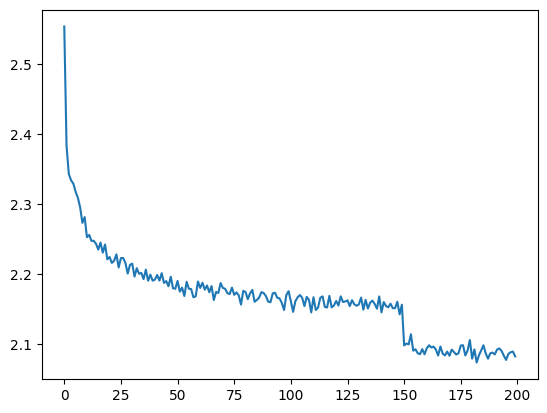

In [29]:
mean_losses = torch.tensor(lossi).view(200, -1).mean(1)
plt.plot(mean_losses)

In [30]:
# We should put the Batchnorm layer in inference mode
for layer in model.layers:
  layer.training = False

The previous changes will also let us to simplify the evaluation and even the sampling steps:

In [31]:
@torch.no_grad()
def split_loss(split):
  x, y = {
      'train': (Xtr, Ytr),
      'val': (Xdev, Ydev),
      'test': (Xte, Yte)
  }[split]

  logits = model(x)

  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.058861494064331
val 2.1029791831970215


In [32]:
# Generate 20 names
for _ in range(20):
  out = []
  context = [0] * BLOCK_SIZE

  next_ch = ''

  while next_ch != '.':
    # Model is waiting for a tensor of 2 dimensions (the batch dimension) even
    # if, as in this case, we want a batch with just one sample. That's why we
    # wrap the context in a list when we create the input, to create a new
    # artificial dimension
    input = torch.tensor([context])
    logits = model(input)
    probs = F.softmax(logits, dim=1)
    next_ch_ix = torch.multinomial(probs, 1).item()
    next_ch = itos[next_ch_ix]
    out.append(next_ch)

    context = context[1:] + [next_ch_ix]

  name = ''.join(out)
  print(name)

aed.
rianiam.
karka.
aris.
tri.
gerreslyn.
sayvo.
reine.
sophemae.
caqine.
aubraydenthira.
liza.
jah.
grancealynna.
jamark.
lobrena.
camya.
makyia.
cer.
tyre.


We see that we have similar loss value in `val` and `train` splits, that's a sign of that we can make our model more complex adding neurons, layers or both. Let take a look to the architecture of the current implementation:



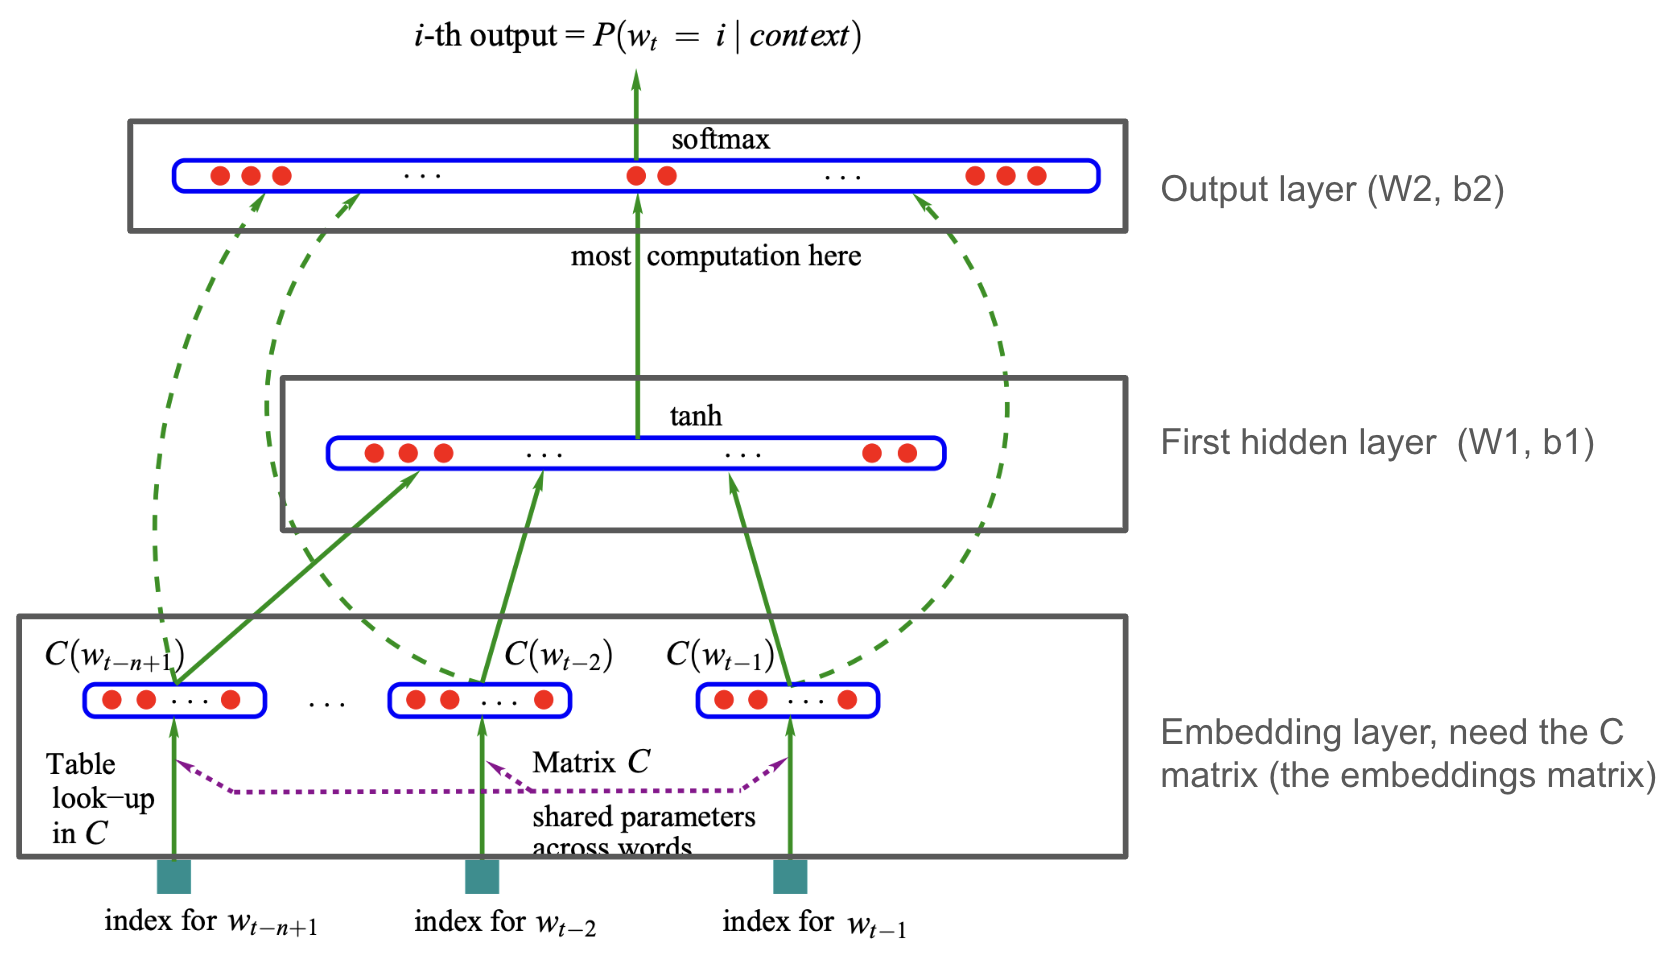

The problem is that there is no productive way to scale this arquitecture:
If we add more hidden layers we still have the issue that the embedded has been compressed at the begining so we have already lost information. If we add more block we do not neither solve the problem about compress too much information in just one step.

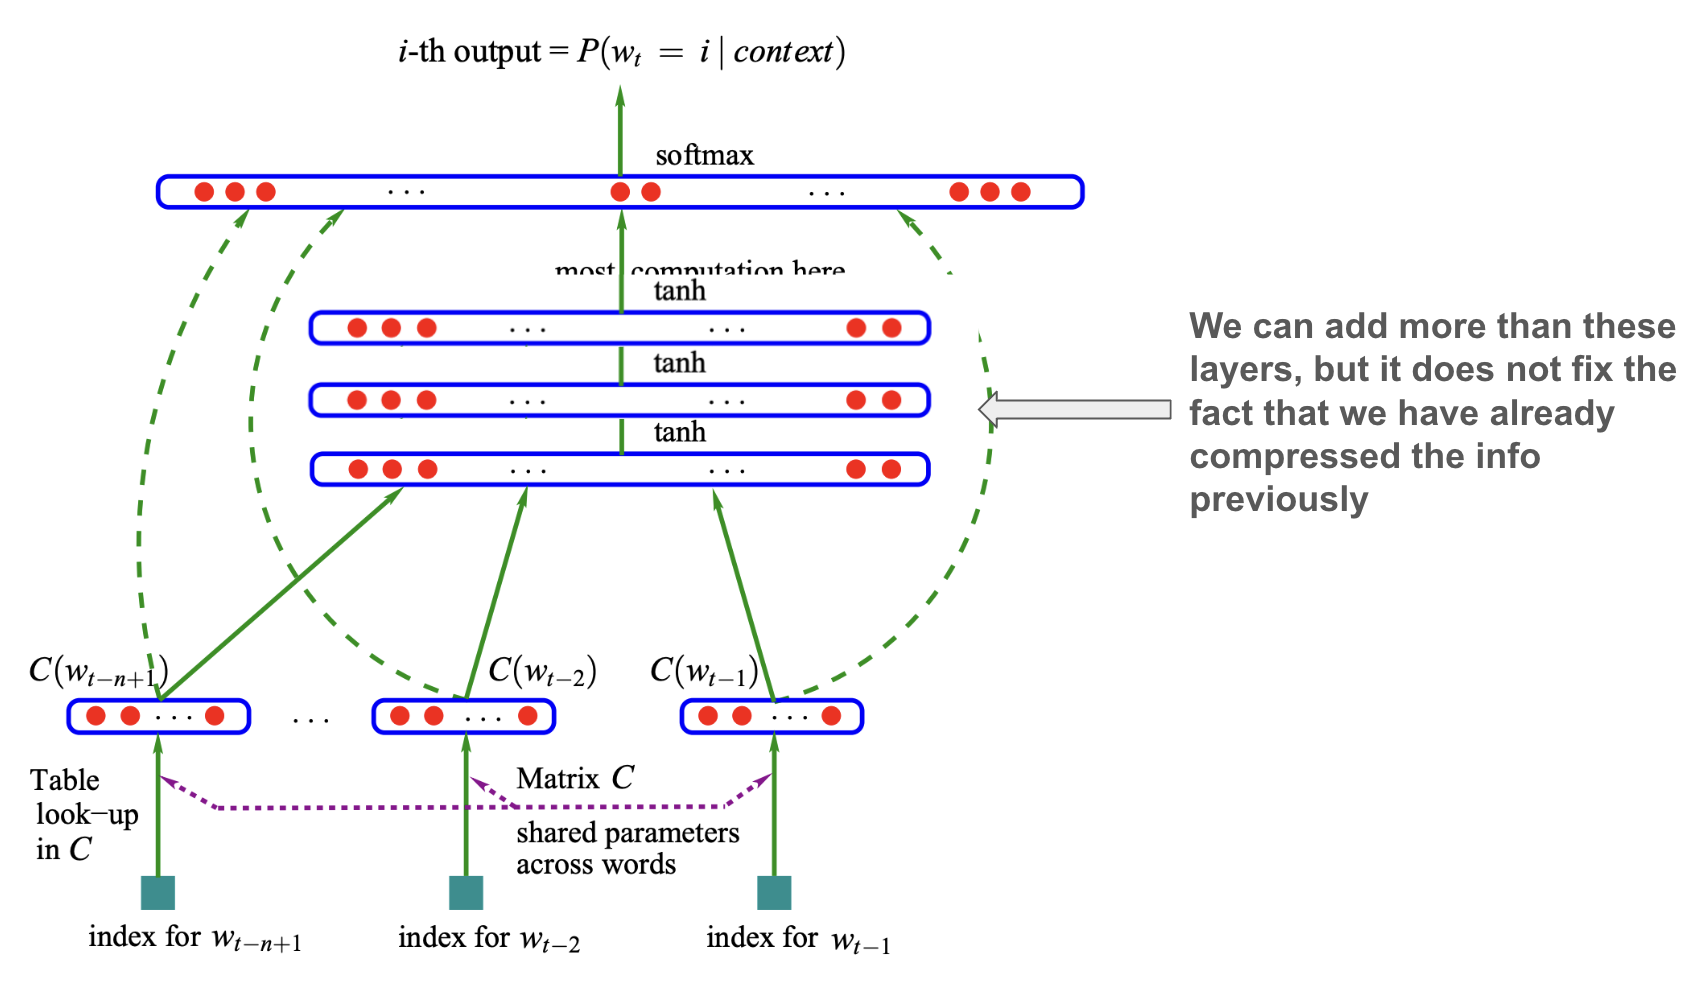

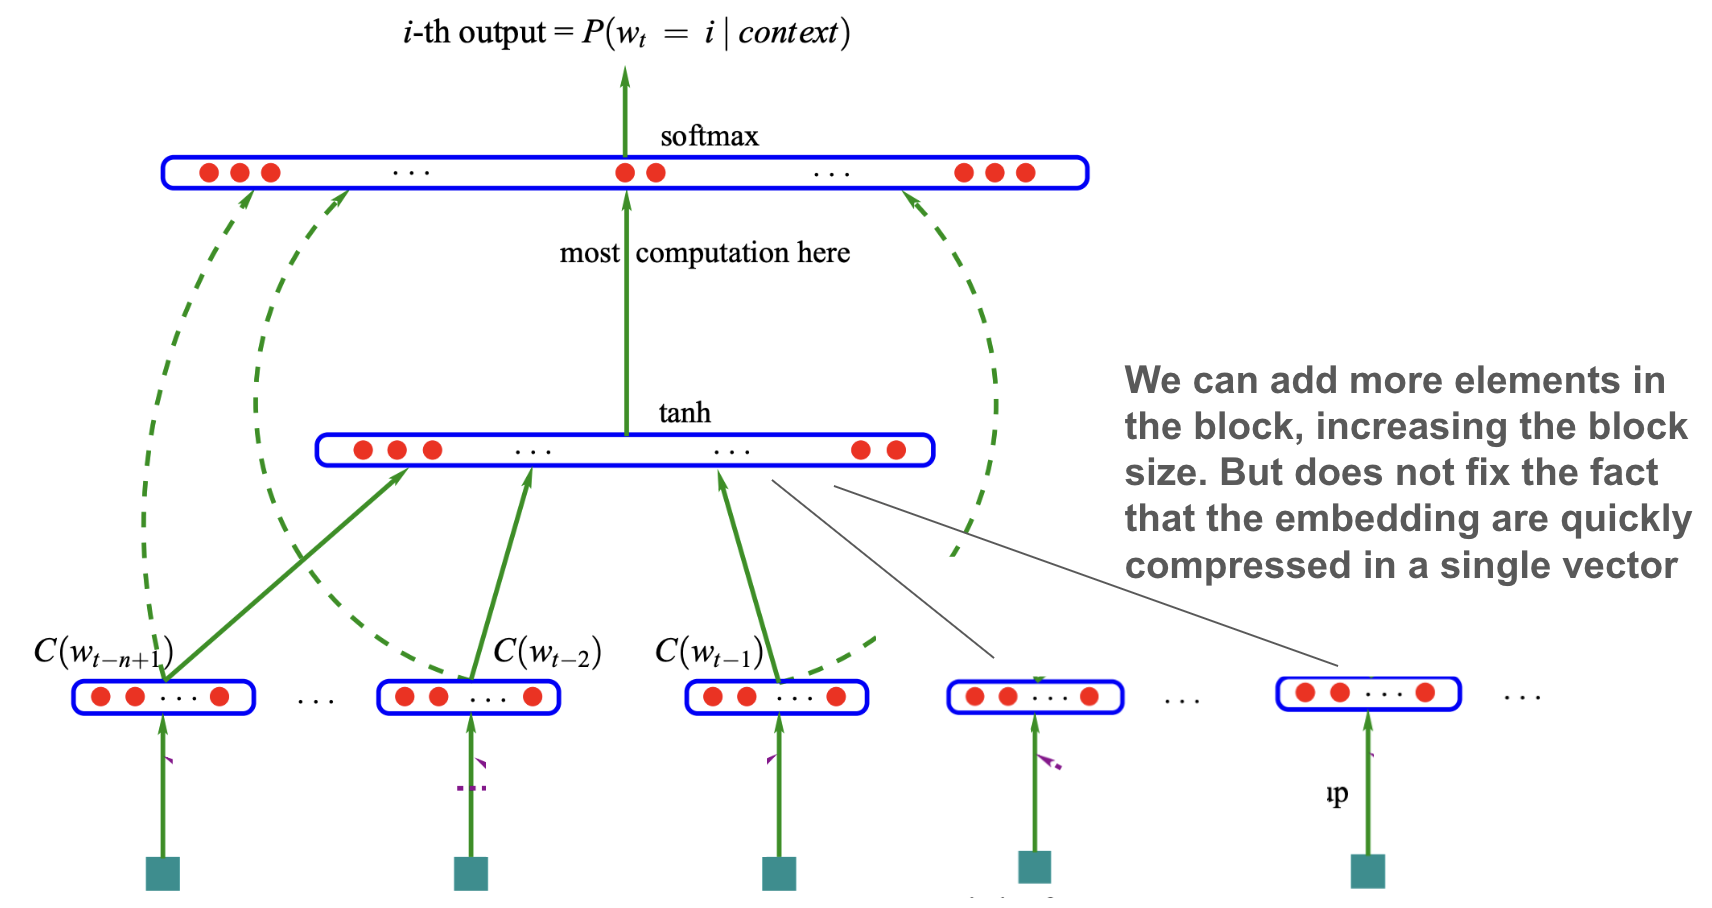

Now lets take a look to the Wavenet implementation

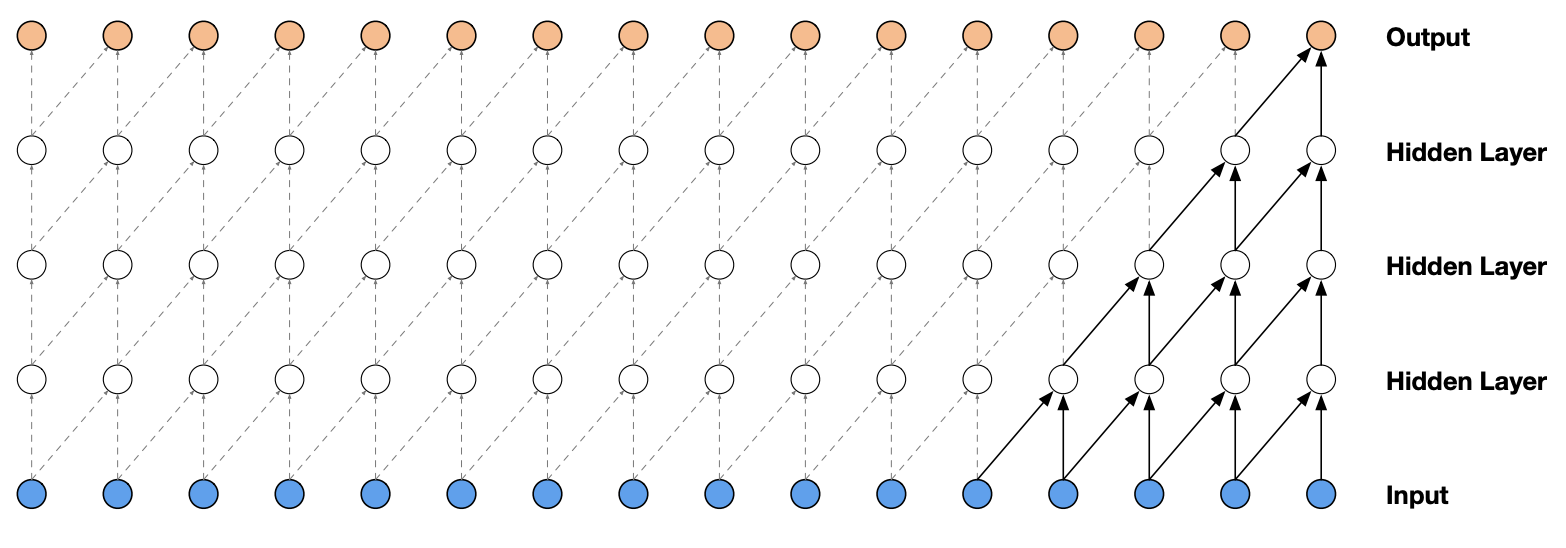

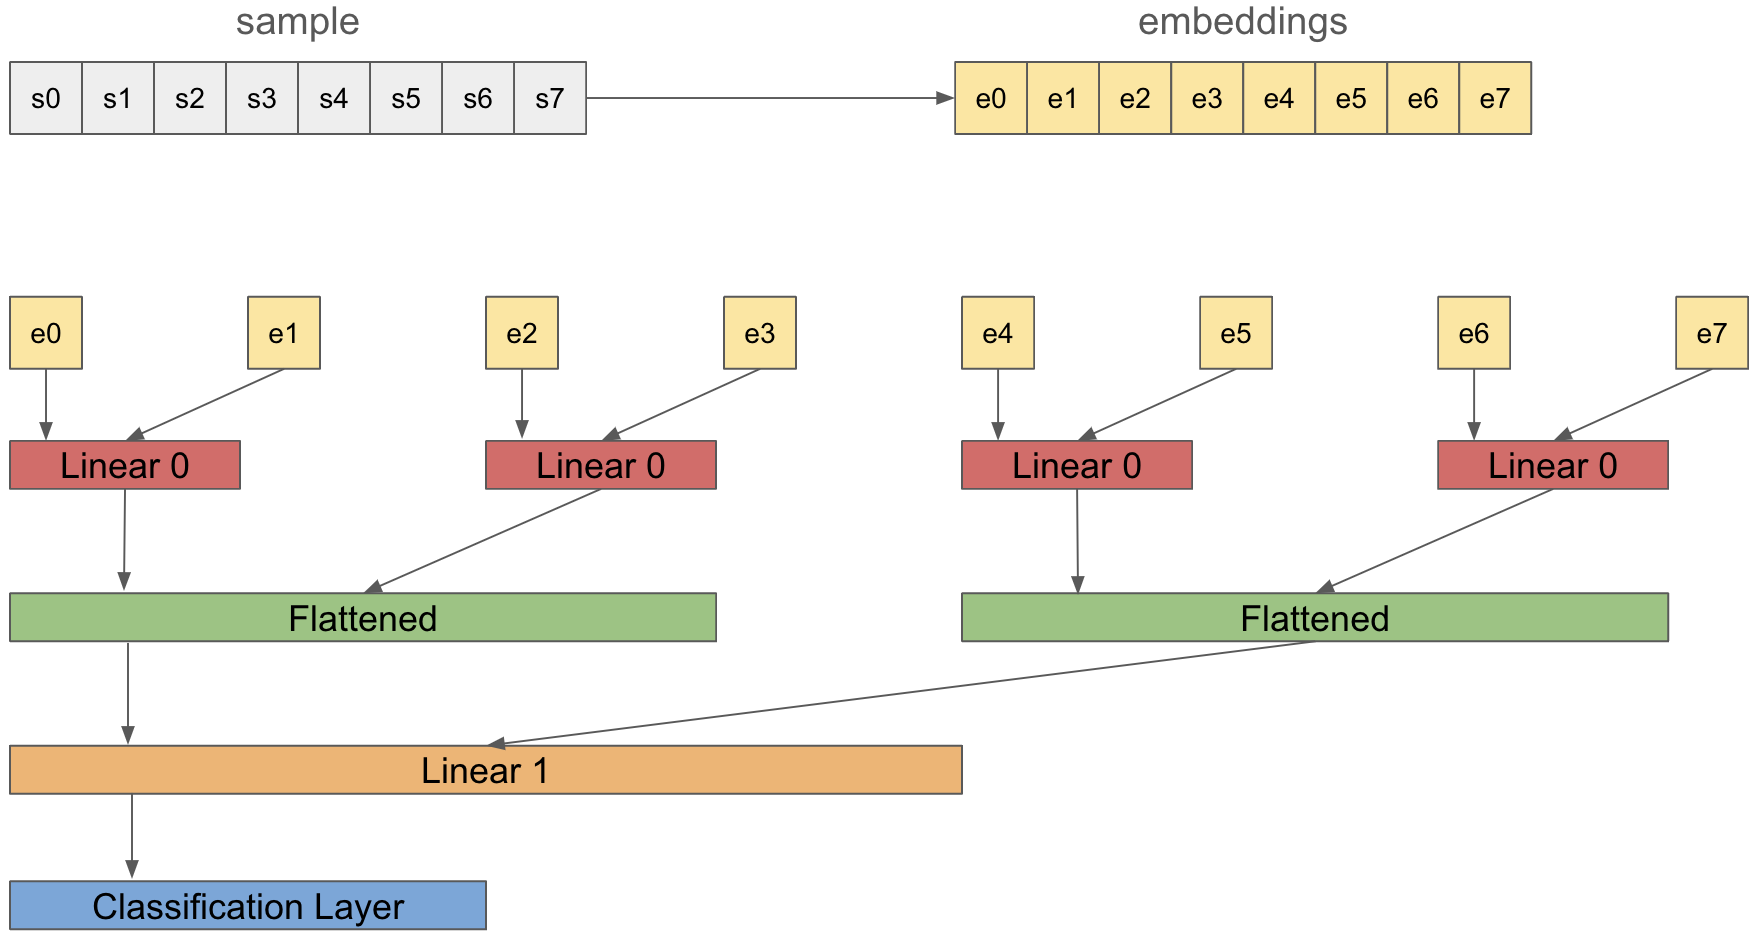

As we can see Wavenet progresively add information in later layers. First its fuse two characters in a bigram, then it fuse couples of bigrams, then couples of couples of bigrams and so on. In this way the information is added more slowly that with the previous version.

The first thing that we should do is to create the new dataset. This new dataset will have a longer context: 8 characters instead of 3:

In [33]:
BLOCK_SIZE = 8

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

print(f"Training split: X.shape -> {Xtr.shape},  Y.shape -> {Ytr.shape}")
print(f"Dev/Val split: X.shape -> {Xdev.shape},  Y.shape -> {Ydev.shape}")
print(f"Test split: X.shape -> {Xte.shape},  Y.shape -> {Yte.shape}")

Training split: X.shape -> torch.Size([182625, 8]),  Y.shape -> torch.Size([182625])
Dev/Val split: X.shape -> torch.Size([22655, 8]),  Y.shape -> torch.Size([22655])
Test split: X.shape -> torch.Size([22866, 8]),  Y.shape -> torch.Size([22866])


In [34]:
# Now we will print some of this examples
for x, y in zip(Xtr[:20], Ytr[:20]):
  print(' '.join([itos[ch.item()] for ch in x]), '---->',itos[y.item()])

. . . . . . . . ----> y
. . . . . . . y ----> u
. . . . . . y u ----> h
. . . . . y u h ----> e
. . . . y u h e ----> n
. . . y u h e n ----> g
. . y u h e n g ----> .
. . . . . . . . ----> d
. . . . . . . d ----> i
. . . . . . d i ----> o
. . . . . d i o ----> n
. . . . d i o n ----> d
. . . d i o n d ----> r
. . d i o n d r ----> e
. d i o n d r e ----> .
. . . . . . . . ----> x
. . . . . . . x ----> a
. . . . . . x a ----> v
. . . . . x a v ----> i
. . . . x a v i ----> e


Now, to set a baseline, let see how good our model behave with the 8 length context

In [35]:
n_embd = 10
n_hidden = 200

model = Sequential([
    Embedding(vocab_size, n_embd), Flatten(),
    Linear(BLOCK_SIZE*n_embd, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
])

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  model.layers[-1].weight *= 0.1

parameters = model.parameters()

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([80, 200])
torch.Size([200])
torch.Size([200])
torch.Size([200, 27])
torch.Size([27])
Total number of parameters: 22097


In [36]:
max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
  b_ixs = torch.randint(low=0, high=Xtr.shape[0], size=(batch_size,))
  Xb, Yb = Xtr[b_ixs], Ytr[b_ixs]

  logits = model(Xb)

  loss = F.cross_entropy(logits, Yb)

  lossi.append(loss.item())

  for p in model.parameters():
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 150_000 else 0.01
  for p in parameters:
    p.data -= lr * p.grad

  if i % 10000 == 0:
    print(loss.item())

3.3064799308776855
2.332766056060791
2.159508466720581
2.0586955547332764
2.302149772644043
1.8915925025939941
2.364804983139038
2.1563963890075684
2.292858600616455
2.0765621662139893
2.1629390716552734
2.0094239711761475
1.9399843215942383
2.009395122528076
1.8687554597854614
1.614806056022644
1.7540693283081055
2.3768904209136963
1.9197043180465698
1.7127712965011597


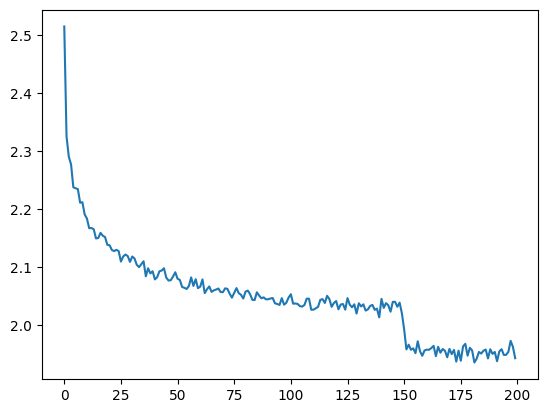

In [37]:
mean_losses = torch.tensor(lossi).view(200, -1).mean(1)
plt.plot(mean_losses)

In [38]:
# We should put the Batchnorm layer in inference mode
for layer in model.layers:
  layer.training = False

In [39]:
@torch.no_grad()
def split_loss(split):
  x, y = {
      'train': (Xtr, Ytr),
      'val': (Xdev, Ydev),
      'test': (Xte, Yte)
  }[split]

  logits = model(x)

  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.9119142293930054
val 2.020153045654297


In [40]:
# Generate 20 names
for _ in range(20):
  out = []
  context = [0] * BLOCK_SIZE

  next_ch = ''

  while next_ch != '.':
    # Model is waiting for a tensor of 2 dimensions (the batch dimension) even
    # if, as in this case, we want a batch with just one sample. That's why we
    # wrap the context in a list when we create the input, to create a new
    # artificial dimension
    input = torch.tensor([context])
    logits = model(input)
    probs = F.softmax(logits, dim=1)
    next_ch_ix = torch.multinomial(probs, 1).item()
    next_ch = itos[next_ch_ix]
    out.append(next_ch)

    context = context[1:] + [next_ch_ix]

  name = ''.join(out)
  print(name)

narir.
lille.
willo.
layelle.
hioth.
joelle.
myiah.
chiyana.
elianne.
davide.
nathtil.
juday.
keimo.
averiaose.
anishanni.
wylin.
arleer.
breedyn.
shanna.
bryon.


We are going to track the losses that we get after some changes in the original model. So lets start taking note of it:

|                                                                | Train loss        | Val loss           |
|----------------------------------------------------------------|-------------------|--------------------|
| Original (3 character context, 200 hidden neurons, 12k params) | 2.058861494064331 | 2.1029791831970215 |
| Context 3 -> 8 (22k params)                                    | 1.910690426826477 | 2.0259077548980713 |

Before to starting to create the new model let see how the required input shape of Wavenet fit in our current layer classes.

Let supouse that we have a small batch, 4 samples, each one made up 8 consecutive tokens:

In [41]:
ix = torch.randint(0, Xtr.shape[0], (4,))

Xb, Yb = Xtr[ix], Ytr[ix]

# We make a forward pass using this batch as input to check later the
# resulting shape on each layer
logits = model(Xb)
print(Xb.shape)
Xb

torch.Size([4, 8])


tensor([[ 0,  0,  0,  0,  0,  0,  0, 11],
        [ 0,  0,  0, 18,  5, 13,  9, 14],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 13,  9, 12]])

In [42]:
# Here we have our embedding, 4 samples, 8 tokens each sample, 10 dimensions
# each embedding
model.layers[0].out.shape

torch.Size([4, 8, 10])

In [43]:
# The ouput of the flatten layer, no we have 4 samples each of them is a row
# with all the embeddings
model.layers[1].out.shape

torch.Size([4, 80])

In [44]:
# First linear layer's output
model.layers[2].out.shape

torch.Size([4, 200])

Now lets simulate a forward pass through a Linear layer

In [45]:
(torch.randn(4, 80) @ torch.randn(80, 200) + torch.randn(200)).shape

torch.Size([4, 200])

Now lets add an extra dimmension **just** in the input and the another one:

In [46]:
print((torch.randn(4, 5, 80) @ torch.randn(80, 200) + torch.randn(200)).shape)
print((torch.randn(4, 5, 2, 80) @ torch.randn(80, 200) + torch.randn(200)).shape)

torch.Size([4, 5, 200])
torch.Size([4, 5, 2, 200])


It does not matter the number of dimmensions that we add, the matrix multiplication `@` just operate over the last dimmension, in this case the one with `80` element in the input. The rest of the elements are left unchanged because they are token as batch dimmensions:

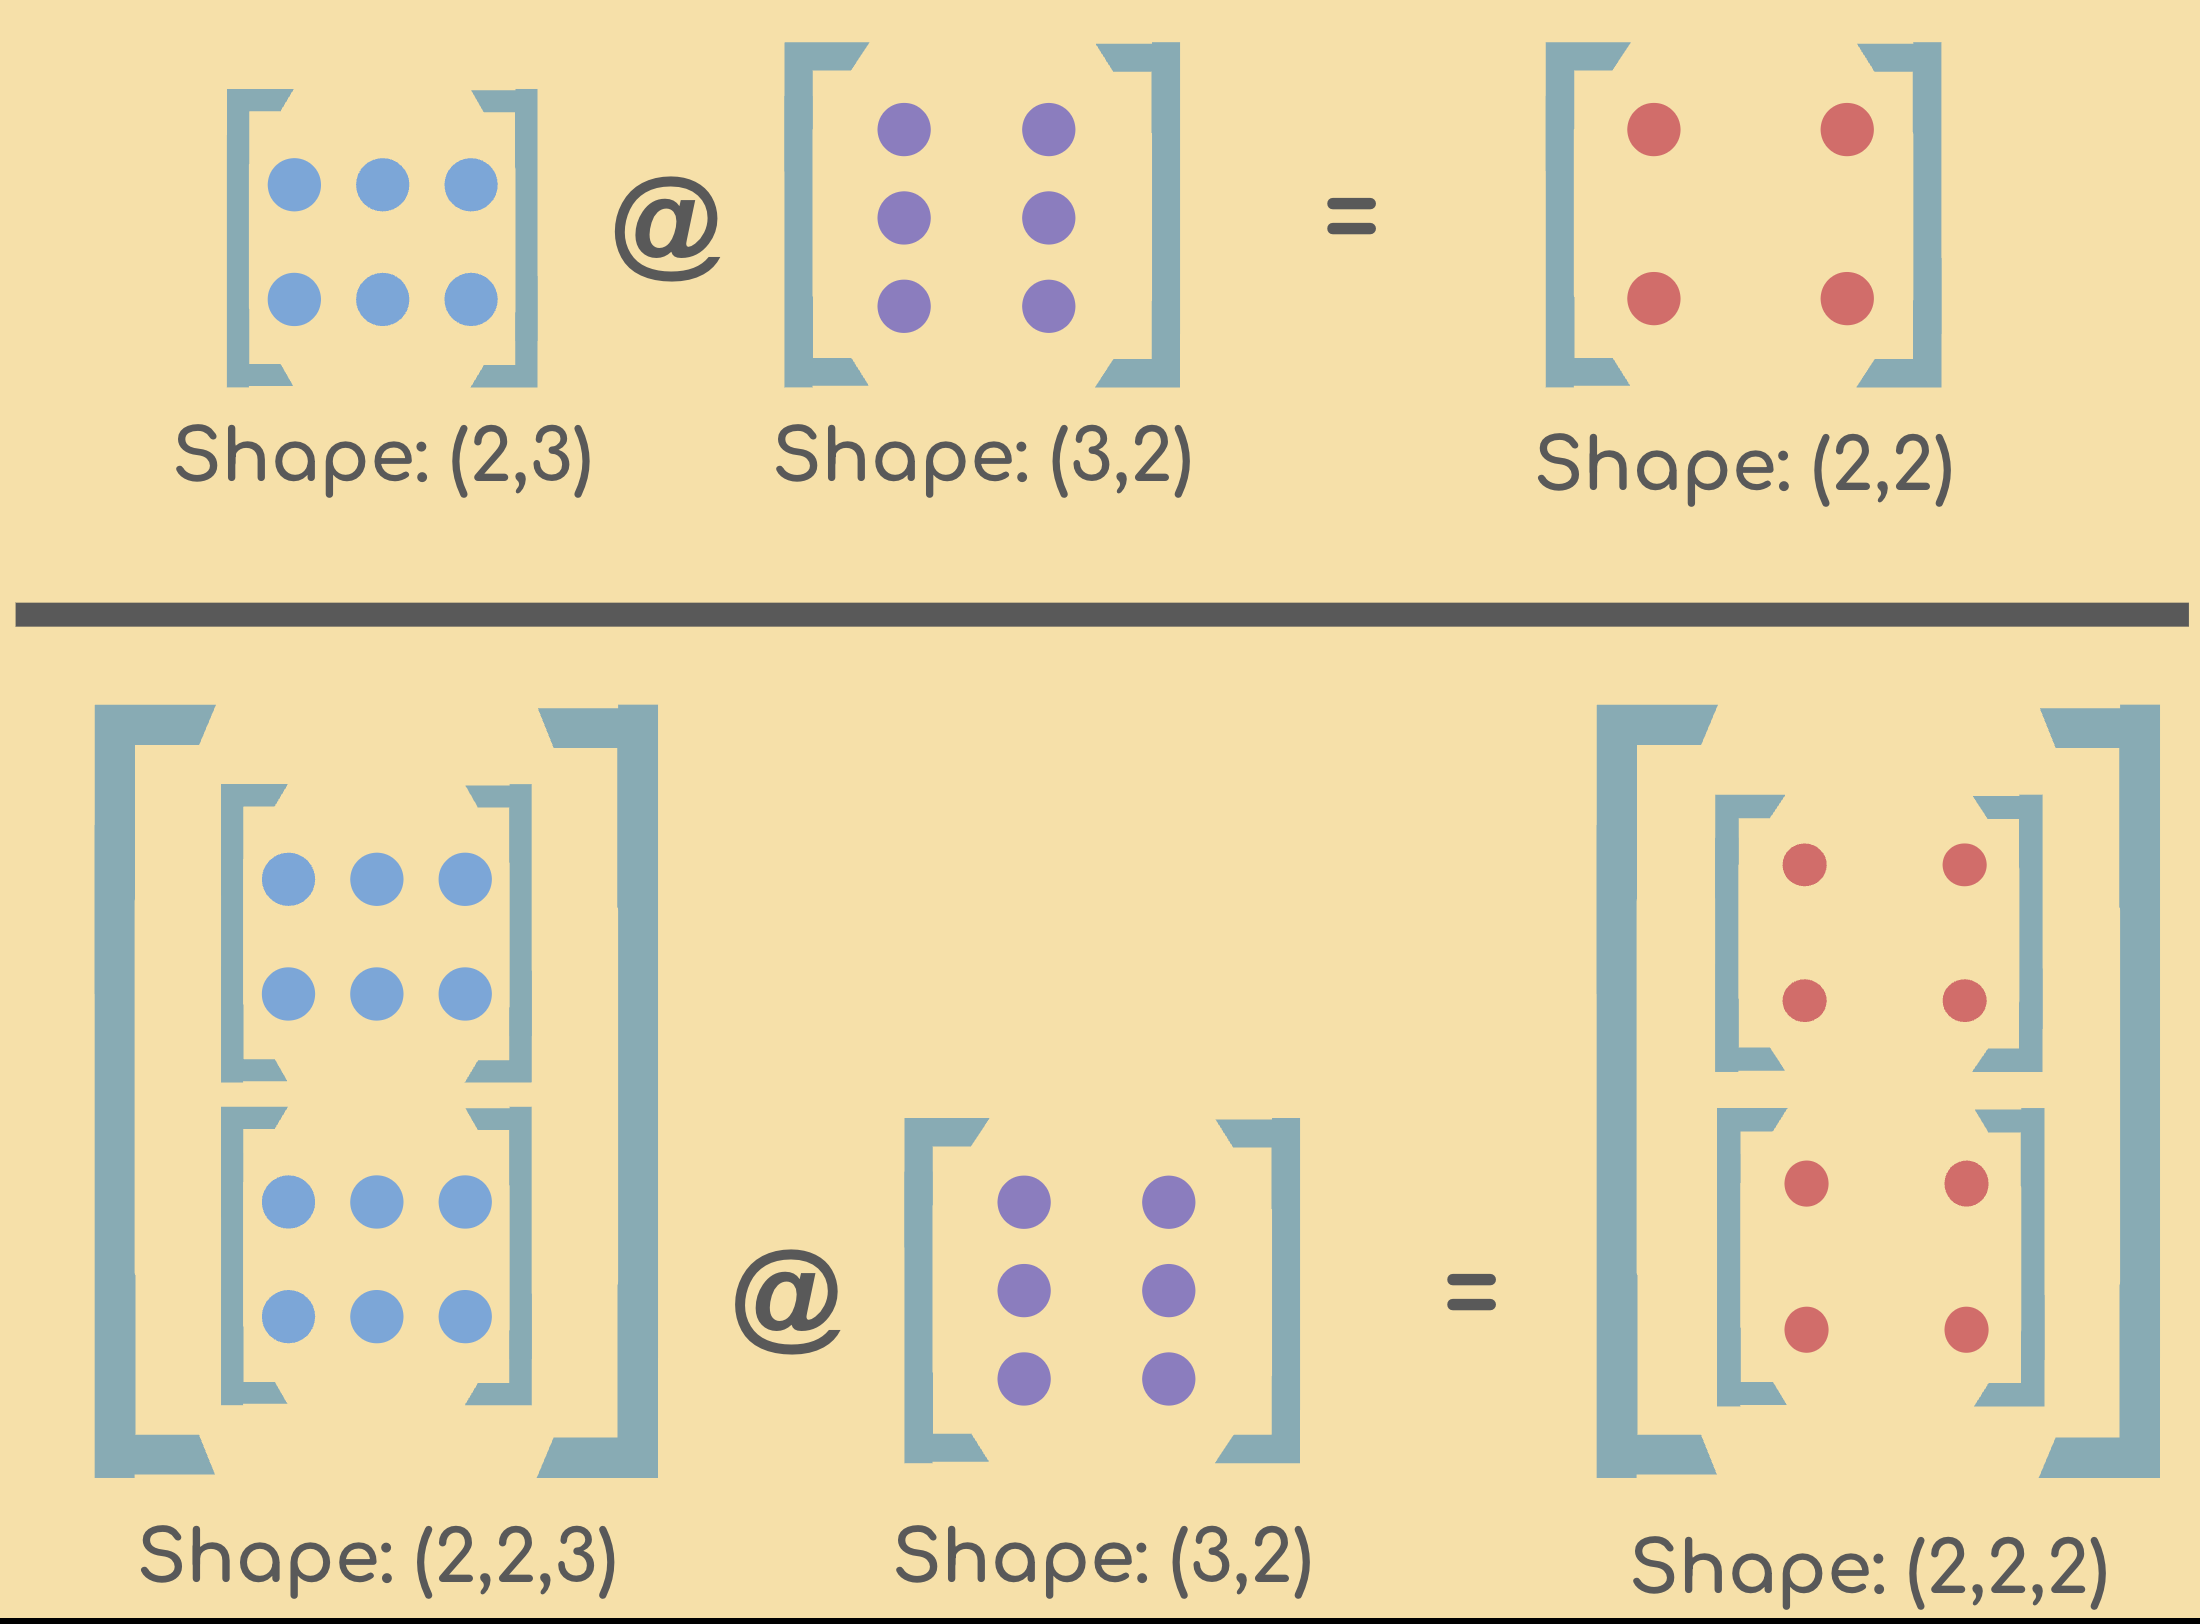

This property of the broadcast is very interesting to us because we want to perform the matrix multiplication as follow:

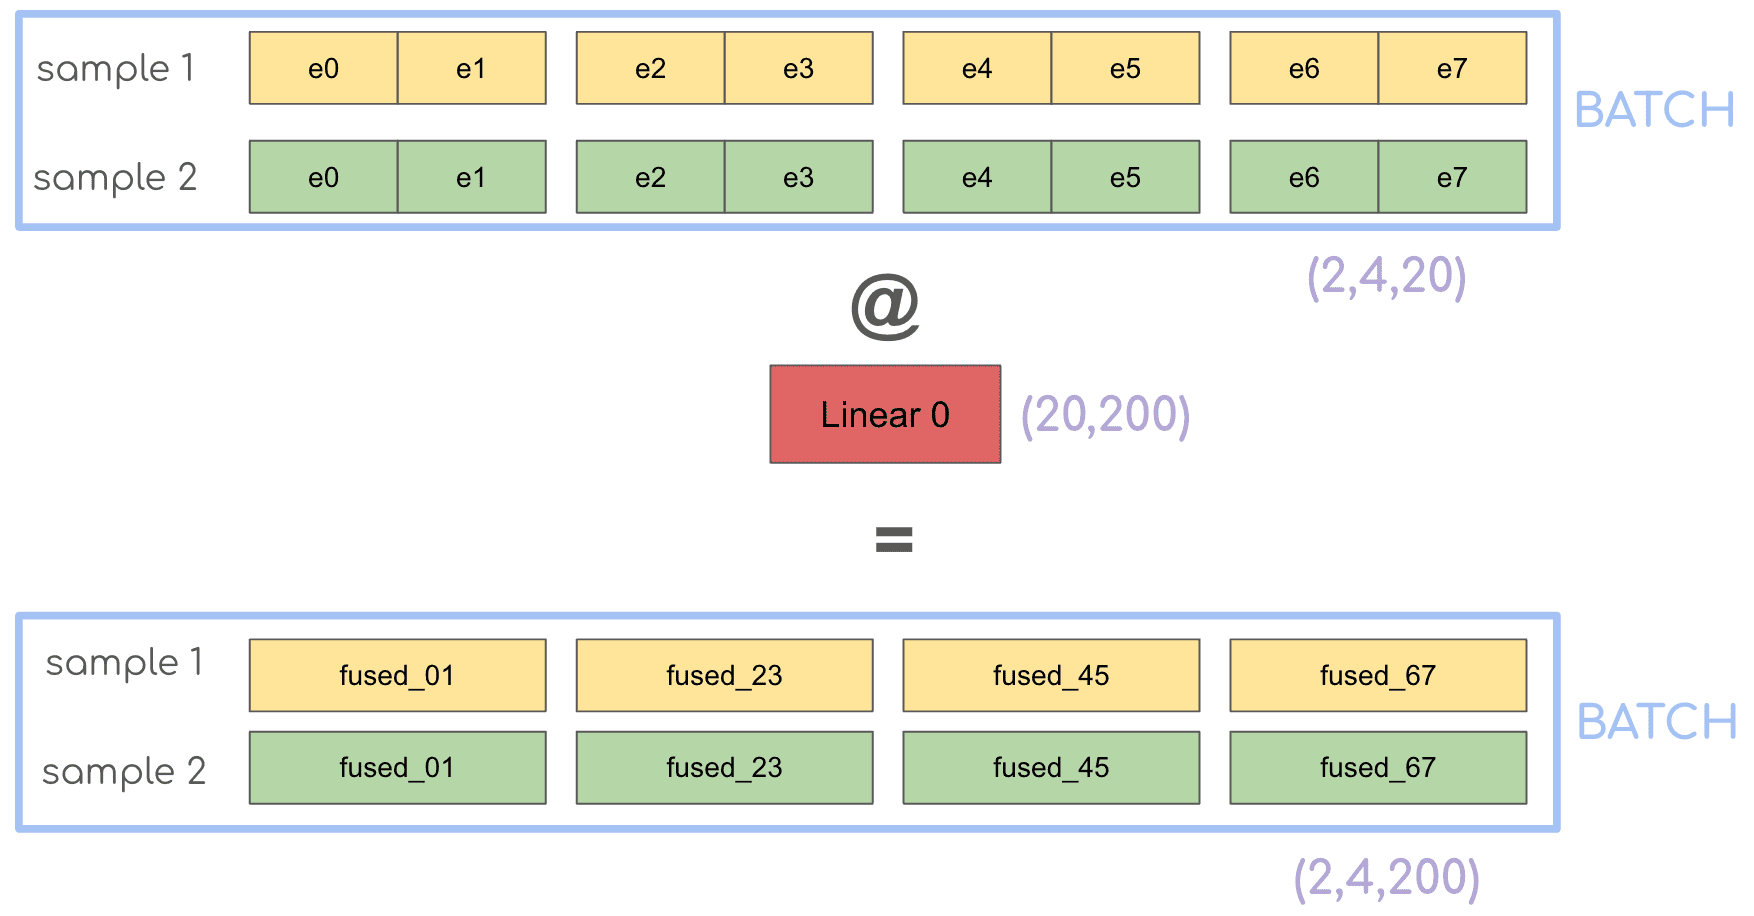

As we can see now we can process in parallel couples of tokens, in the case of the image we have a batch with two samples, each of this samples is made up of 8 characters, that are transformed into 8 embeddings (e0, e1,...) and we have gropued this tokens in 4 groups (tuples of 2). And then we perform the matrix multiplication of this batch, getting at result the same two samples but now with four vectors of fused information each of them.

Now that we know that the matrix multiplication is going to works (and how it works) let see how we transform our current splits in the new required shape.

Until now our data have the following shape (lets suppouse that we take a batch of 32 elements):

In [47]:
tmp_batch = Xtr[:32,:]
print(f"Batch shape -> {tmp_batch.shape}")

Batch shape -> torch.Size([32, 8])


Now, as the first step in the same way that we do in our model, we get the embeddings for this batch:

In [48]:
fl = Embedding(vocab_size, n_embd)
fl(tmp_batch).shape

torch.Size([32, 8, 10])

Now what we want is group the 8 embeddings for each sample in 4 groups (tuples) of 2. We want that:
* the first of this groups contains the embeddings with indexes 0 and 1
* the second group the embeddings with the indexes 2 and 3
* the third group the embeddings with the indexes 4 and 5
* the fourth group the embeddings with the indexes 6 and 7

How can we get this?

There is two valid aproaches:
1. Explicit concatenation of two sliced subtensors
2. `view` method

In [49]:
tmp_tensor = torch.randint(0, 100, (4, 4, 2))
print(tmp_tensor.shape)
print(tmp_tensor)

torch.Size([4, 4, 2])
tensor([[[76, 70],
         [27, 66],
         [48, 79],
         [54, 33]],

        [[44, 53],
         [31, 30],
         [60, 67],
         [49, 73]],

        [[23, 23],
         [28, 89],
         [49,  9],
         [14, 30]],

        [[91, 61],
         [44, 72],
         [81, 47],
         [20, 69]]])


In [50]:
tmp_tensor_a = tmp_tensor[:, ::2, :]
print(tmp_tensor_a.shape)
print(tmp_tensor_a)

torch.Size([4, 2, 2])
tensor([[[76, 70],
         [48, 79]],

        [[44, 53],
         [60, 67]],

        [[23, 23],
         [49,  9]],

        [[91, 61],
         [81, 47]]])


In [51]:
tmp_tensor_b = tmp_tensor[:, 1::2, :]
print(tmp_tensor_b.shape)
print(tmp_tensor_b)

torch.Size([4, 2, 2])
tensor([[[27, 66],
         [54, 33]],

        [[31, 30],
         [49, 73]],

        [[28, 89],
         [14, 30]],

        [[44, 72],
         [20, 69]]])


As we can se now we have two tensors `tmp_tensor_a` and `tmp_tensor_b` each of them with all the samples (4) and the full embedding dims of each embedding that they contains. But `tmp_tensor_a` contains the embeddings dims of the even embeddings and `tmp_tensor_b` contains the embeddings dims of the odd embeddings.

Now if we concatenate this information through the dim=2:

In [52]:
concat_tmp = torch.cat([tmp_tensor_a, tmp_tensor_b], dim=2)
print(concat_tmp.shape)
print(concat_tmp)

torch.Size([4, 2, 4])
tensor([[[76, 70, 27, 66],
         [48, 79, 54, 33]],

        [[44, 53, 31, 30],
         [60, 67, 49, 73]],

        [[23, 23, 28, 89],
         [49,  9, 14, 30]],

        [[91, 61, 44, 72],
         [81, 47, 20, 69]]])


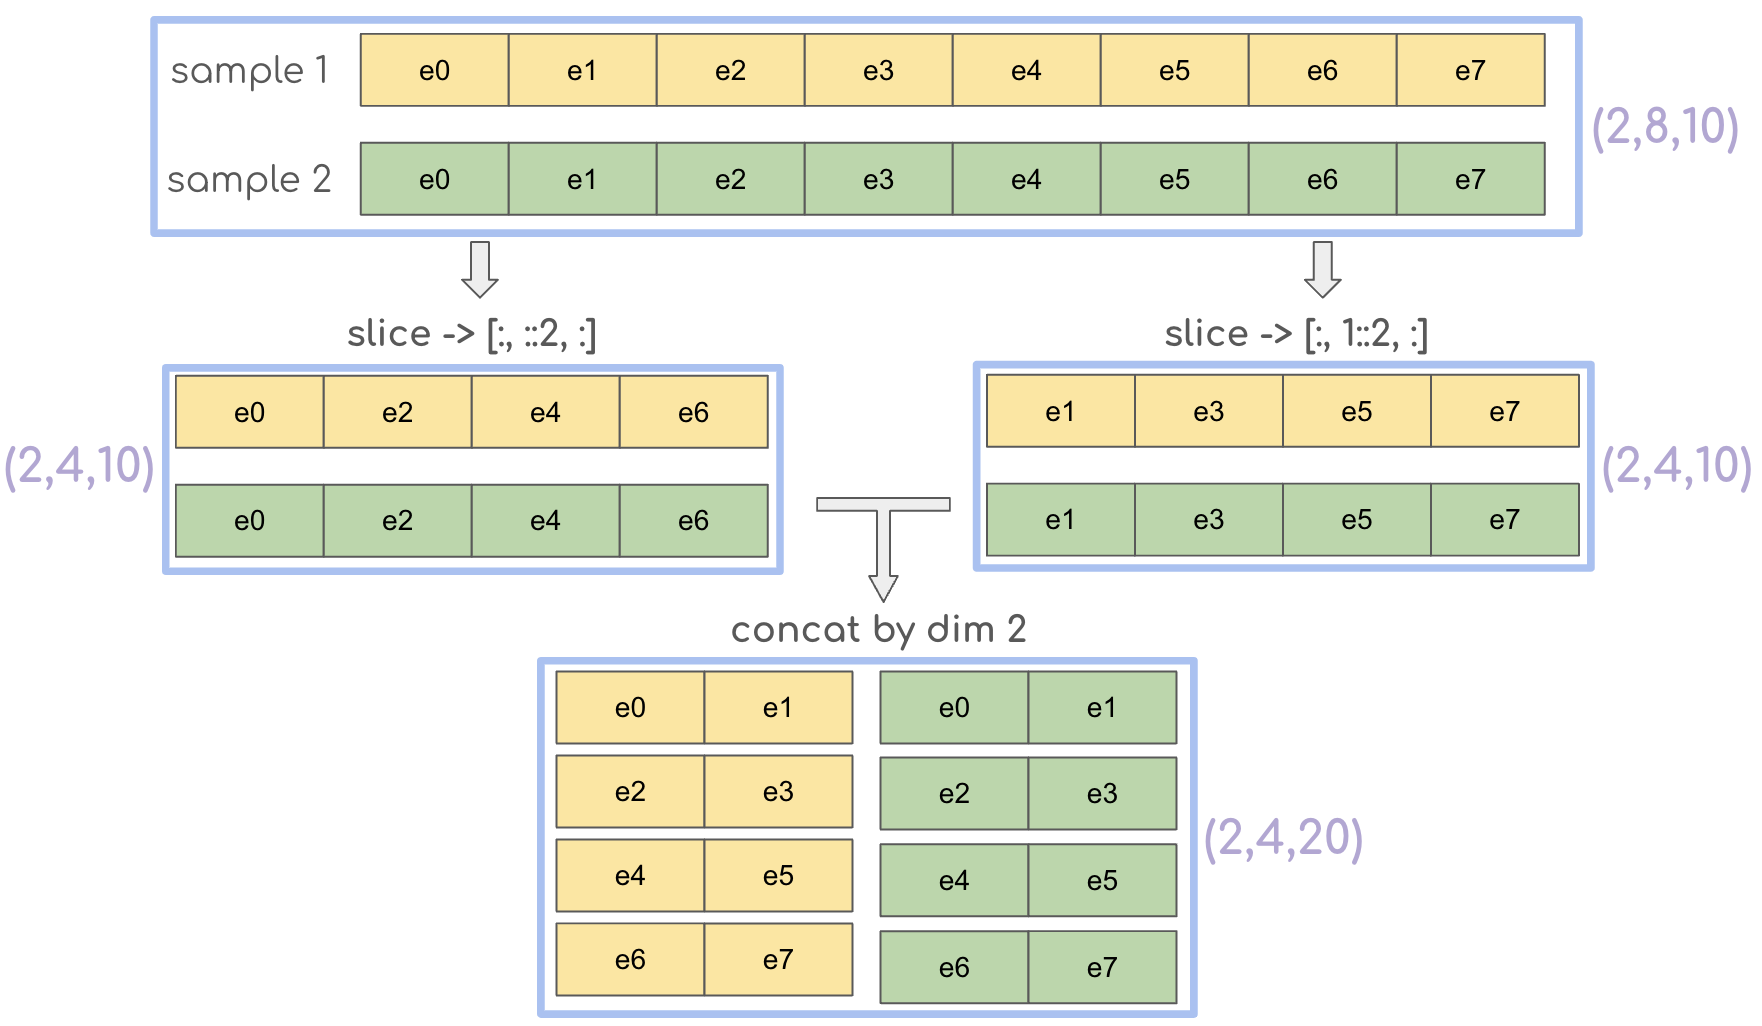

This approach is Ok, but maybe not the most performant one. Always is a better option to use the `view` method when it is possible.

So we can simply do:

In [53]:
view_tmp = tmp_tensor.view(tmp_tensor.shape[0], 2,-1)
print(view_tmp)

tensor([[[76, 70, 27, 66],
         [48, 79, 54, 33]],

        [[44, 53, 31, 30],
         [60, 67, 49, 73]],

        [[23, 23, 28, 89],
         [49,  9, 14, 30]],

        [[91, 61, 44, 72],
         [81, 47, 20, 69]]])


We can check that both approaches result in the same output:

In [54]:
(view_tmp == concat_tmp).all().item()

True

Lets now implement this new feature in the Layers code, specifically we will use it in the Flatten layer, we call this layer FlattenConsecutive to not conflict with the original Torch layer:

In [78]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.rand((fan_in, fan_out)) / fan_in**0.5
    self.bias = torch.rand((fan_out)) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias

    return self.out

  def parameters(self):
    return [self.weight] + ([self.bias] if self.bias is not None else [])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # Parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # Buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    if self.training:
      xmean = x.mean(0, keepdim=True)
      xvar = x.var(0, keepdim=True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    x_hat = (x-xmean) / (xvar + self.eps)**0.5
    self.out = self.gamma*x_hat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1-self.momentum)*self.running_mean + self.momentum*xmean
        self.running_var = (1-self.momentum)*self.running_var + self.momentum*xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]


class Tanh:

  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []


class Embedding:

  def __init__(self, num_embeddings, embedding_dims):
    # Here we do the same that we do when instatiate C
    # * num_embeddings: unique elements in vocab (ie. vocab_size)
    # * embedding_dims: embeding's dimension
    self.weight = torch.rand((num_embeddings, embedding_dims))

  def __call__(self, IX):
    # IX should be a tensor of indexes, that get the desired elements (rows)
    # from the weights (embeddings) matrix
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]


class FlattenConsecutive:
  def __init__(self, n):
    # 'n' will be the number of elements to be concatenated in the last dimmension
    self.n = n

  def __call__(self, x):
    '''
    This function transform a 3D tensor in a 2D tensor, where the first
    dimension is the number of samples in batch and the second is all the
    embeddings for this sample concatenated.

    A concrete example of how this function work is:
    receive a (32, 8, 10) tensor and should ouput a (32, 4, 20)
    '''
    # B is the same as batch size
    # T is the block_size, the number of previous tokens that our model
    #   have into account
    # C is the embedding dimmensions (elements on each embedding in the first layer)
    #   (in the rest of the layers it will be the number of hidden units)
    B, T, C = x.shape

    # In the ouput we want:
    # * The same number of elements in the batch, so we keep B
    # * Half of the elments in block ie. T//2 because we want to
    #   concat in the last dimensión 2 of this elements. Maybe this is a parameter
    #   that we can tune if we want to take into account 3 or more at same time
    # * The last dimension will be the concatenation of the tokens that live
    #   in the same block
    x = x.view(B, T//self.n, C*self.n)

    # It can happens, for example in the last layer that when we perform the
    # T//2 operation we end up with a dimmension 1, a spurious dimmension that
    # do not give as any benefit so we will squeeze it:
    if x.shape[1] == 1:
      x = x.squeeze(dim=1)
    self.out = x
    return self.out

  def parameters(self):
    return []


class Sequential:

  def __init__(self, layers):
    # layers is the list of layers
    self.layers = layers

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)

    self.out = x
    return self.out

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [79]:
torch.manual_seed(42);

In [80]:
n_embd = 10
n_hidden = 200

model = Sequential([
    Embedding(vocab_size, n_embd),
    # This flaten: 8 -> 4
    FlattenConsecutive(2),Linear(n_embd*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 4 -> 2
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 2 -> 1
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
])

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  model.layers[-1].weight *= 0.1

parameters = model.parameters()

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([20, 200])
torch.Size([200])
torch.Size([200])
torch.Size([400, 200])
torch.Size([200])
torch.Size([200])
torch.Size([400, 200])
torch.Size([200])
torch.Size([200])
torch.Size([200, 27])
torch.Size([27])
Total number of parameters: 170897


Lets now to perform a single forward pass just to check if all the dimmensions are as expected:

In [81]:
ix = torch.randint(0, Xtr.shape[0], (4,))
Xb, Yb = Xtr[ix], Ytr[ix]

logits = model(Xb)
print(Xb.shape)
Xb

torch.Size([4, 8])


tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 19, 11, 25, 12,  5,  5],
        [ 0,  0,  0,  0,  0,  0, 10, 15],
        [ 0,  0, 14, 15, 12, 12,  1, 14]])

In [82]:
for layer in model.layers:
  print(layer.__class__.__name__, 'Output shape :', tuple(layer.out.shape))

Embedding Output shape : (4, 8, 10)
FlattenConsecutive Output shape : (4, 4, 20)
Linear Output shape : (4, 4, 200)
BatchNorm1d Output shape : (4, 4, 200)
Tanh Output shape : (4, 4, 200)
FlattenConsecutive Output shape : (4, 2, 400)
Linear Output shape : (4, 2, 200)
BatchNorm1d Output shape : (4, 2, 200)
Tanh Output shape : (4, 2, 200)
FlattenConsecutive Output shape : (4, 400)
Linear Output shape : (4, 200)
BatchNorm1d Output shape : (4, 200)
Tanh Output shape : (4, 200)
Linear Output shape : (4, 27)


In [83]:
model.layers[3].running_mean.shape

torch.Size([1, 4, 200])

Now lets modify the number of hidden units to match the total number of paramters with our previous version, and in this way check if we get any improvement in the loss.

In [60]:
torch.manual_seed(42);

In [61]:
n_embd = 10
n_hidden = 68

model = Sequential([
    Embedding(vocab_size, n_embd),
    # This flaten: 8 -> 4
    FlattenConsecutive(2),Linear(n_embd*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 4 -> 2
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 2 -> 1
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
])

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  model.layers[-1].weight *= 0.1

parameters = model.parameters()

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([20, 68])
torch.Size([68])
torch.Size([68])
torch.Size([136, 68])
torch.Size([68])
torch.Size([68])
torch.Size([136, 68])
torch.Size([68])
torch.Size([68])
torch.Size([68, 27])
torch.Size([27])
Total number of parameters: 22397


In [62]:
max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
  b_ixs = torch.randint(low=0, high=Xtr.shape[0], size=(batch_size,))
  Xb, Yb = Xtr[b_ixs], Ytr[b_ixs]

  logits = model(Xb)

  loss = F.cross_entropy(logits, Yb)

  lossi.append(loss.item())

  for p in model.parameters():
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 150_000 else 0.01
  for p in parameters:
    p.data -= lr * p.grad

  if i % 10000 == 0:
    print(loss.item())

3.297661781311035
2.427448034286499
2.3035218715667725
2.082183599472046
2.474979877471924
2.4460525512695312
2.2784600257873535
1.7268846035003662
2.040588855743408
2.004089593887329
1.8618344068527222
2.160521984100342
2.3142902851104736
1.7975001335144043
2.2589399814605713
1.784639596939087
1.6492542028427124
2.1572792530059814
2.215059995651245
1.6938413381576538


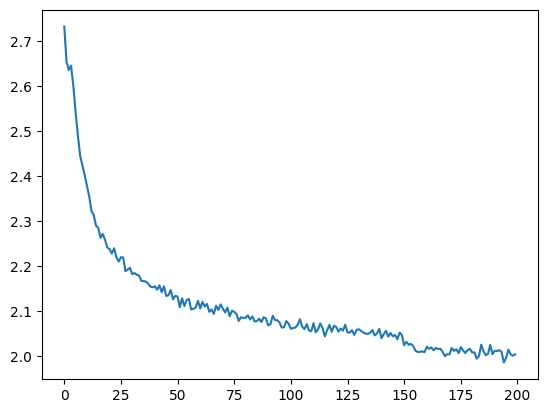

In [63]:
mean_losses = torch.tensor(lossi).view(200, -1).mean(1)
plt.plot(mean_losses)

In [64]:
# We should put the Batchnorm layer in inference mode
for layer in model.layers:
  layer.training = False

In [65]:
@torch.no_grad()
def split_loss(split):
  x, y = {
      'train': (Xtr, Ytr),
      'val': (Xdev, Ydev),
      'test': (Xte, Yte)
  }[split]

  logits = model(x)

  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.9718620777130127
val 2.0393052101135254


We'll take note of this new mark. It does not seem to perform worst (statistically) or better than the previous one:

|                                                                | Train loss        | Val loss           |
|----------------------------------------------------------------|-------------------|--------------------|
| Original (3 character context, 200 hidden neurons, 12k params) | 2.058861494064331 | 2.1029791831970215 |
| Context 3 -> 8 (22k params)                                    | 1.910690426826477 | 2.0259077548980713 |
| Flat -> Hierarchical (22k params)                                    | 1.9718620777130127 | 2.0393052101135254 |

## Fixing the BatchNorm bug

If we take a look to the BatchNorm implementation we can identify a bug. The issue appears when we calculate `xmean` and `xvar` during the training:

```
def __call__(self, x):
  if self.training:
    xmean = x.mean(0, keepdim=True)
    xvar = x.var(0, keepdim=True)
    ...
```

As we see we calculate mean and variance over the `0` dimmension, this is ok when we work with 2D tensor but it behaves quite diferent when it is a 3D tensor. Lets see a toy example:

In [66]:
tensor_2D = torch.tensor([[4.0, 3.0, 2.0], [6.0, 7.0, 8.0]])
print(tensor_2D.shape)
print(tensor_2D.mean(0, keepdim=True))

torch.Size([2, 3])
tensor([[5., 5., 5.]])


In [67]:
tensor_3D = torch.tensor([
                            [
                              [4.0, 3.0, 2.0], [6.0, 7.0, 8.0]
                            ],
                            [
                              [4.0, 3.0, 2.0], [6.0, 7.0, 8.0]
                            ]
                          ])
print(tensor_3D.shape)
print(tensor_3D.mean(0, keepdim=True))

torch.Size([2, 2, 3])
tensor([[[4., 3., 2.],
         [6., 7., 8.]]])


In [68]:
tensor_3D.mean(dim=(0,1), keepdim=True)

tensor([[[5., 5., 5.]]])

In the following visualization you can see how this mean works over one and two dimmensions:

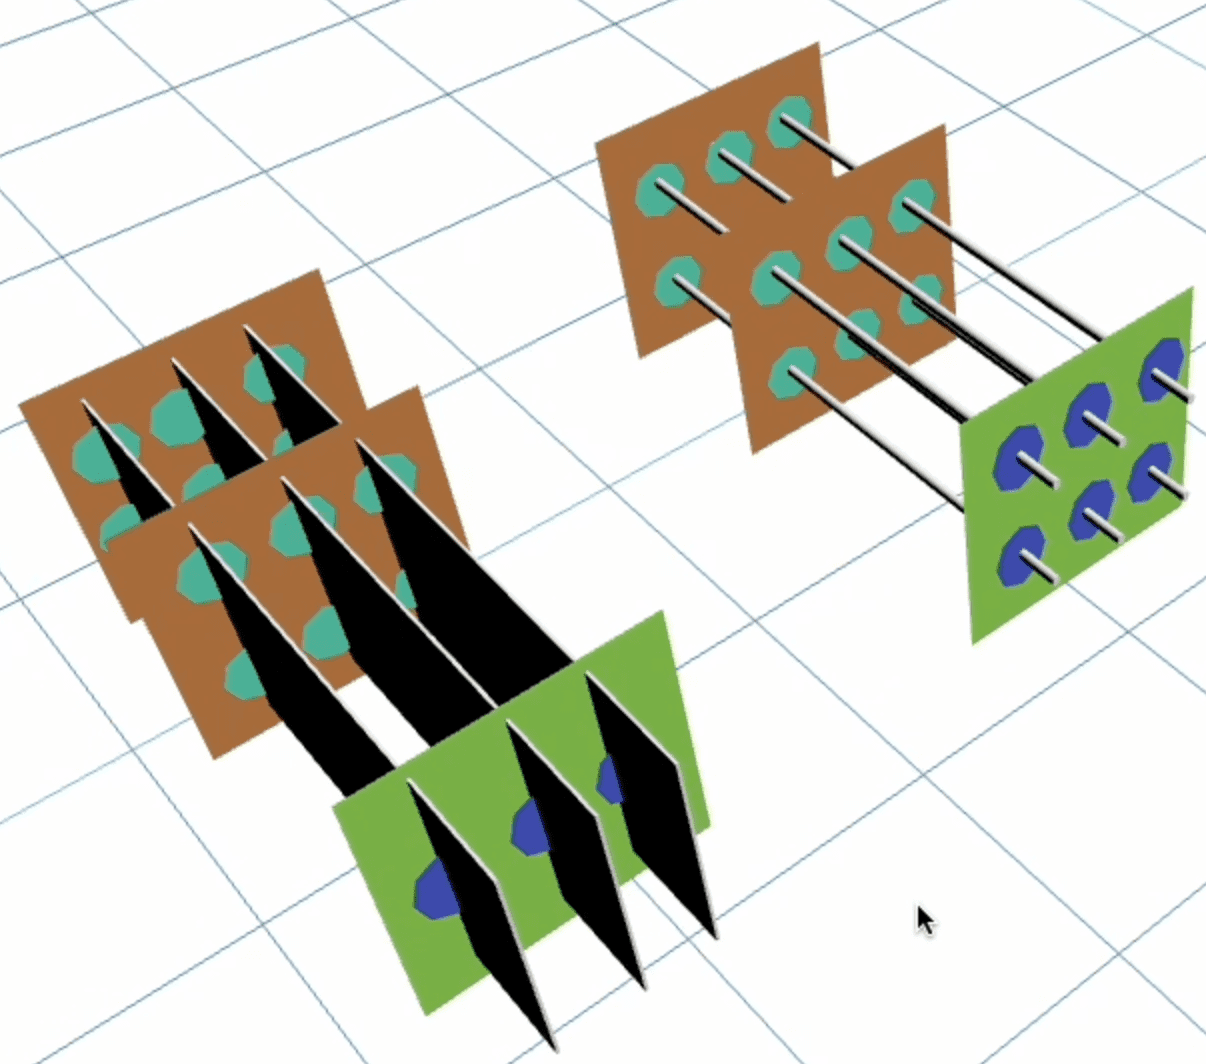

The problem with this bug is dual:
* In one hand we are calculating much more means than the required so it more difficult to calcualte a good mean estimation for each one
* Each calculated mean in calculated over a smallest ammount of numbers, so the estimations are also worst

We can see the problem in previous cells with the output shape of the running_mean in the BatchNorm layer:
```
torch.Size([1, 4, 200])
```

What we want in this case is something like:
```
torch.Size([1, 1, 200])
```


It's interesting how pytorch BathchNorm1d layer works. If we take a look to the [documentations](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) it says that the input layer can have one of the following shapes:
* (`N`,`C`)
* (`N`,`C`,`L`)

Where `N` is the batch size, `C` is the number of features on each channel and `L` is the length of the sequence.

We have seen in previous cells that our input to the BatchNorm layer have a different shape, specifically we expect (`N`,`C`) or (`N`,`L`,`C`)

Lets fix this issue in the layer definition:

In [84]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.rand((fan_in, fan_out)) / fan_in**0.5
    self.bias = torch.rand((fan_out)) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias

    return self.out

  def parameters(self):
    return [self.weight] + ([self.bias] if self.bias is not None else [])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # Parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # Buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    if self.training:
      if x.ndim == 2:
        dims = 0
      elif x.ndim == 3:
        dims = (0,1)
      xmean = x.mean(dims, keepdim=True)
      xvar = x.var(dims, keepdim=True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    x_hat = (x-xmean) / (xvar + self.eps)**0.5
    self.out = self.gamma*x_hat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1-self.momentum)*self.running_mean + self.momentum*xmean
        self.running_var = (1-self.momentum)*self.running_var + self.momentum*xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]


class Tanh:

  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []


class Embedding:

  def __init__(self, num_embeddings, embedding_dims):
    # Here we do the same that we do when instatiate C
    # * num_embeddings: unique elements in vocab (ie. vocab_size)
    # * embedding_dims: embeding's dimension
    self.weight = torch.rand((num_embeddings, embedding_dims))

  def __call__(self, IX):
    # IX should be a tensor of indexes, that get the desired elements (rows)
    # from the weights (embeddings) matrix
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]


class FlattenConsecutive:
  def __init__(self, n):
    # 'n' will be the number of elements to be concatenated in the last dimmension
    self.n = n

  def __call__(self, x):
    '''
    This function transform a 3D tensor in a 2D tensor, where the first
    dimension is the number of samples in batch and the second is all the
    embeddings for this sample concatenated.

    A concrete example of how this function work is:
    receive a (32, 8, 10) tensor and should ouput a (32, 4, 20)
    '''
    # B is the same as batch size
    # T is the block_size, the number of previous tokens that our model
    #   have into account
    # C is the embedding dimmensions (elements on each embedding in the first layer)
    #   (in the rest of the layers it will be the number of hidden units)
    B, T, C = x.shape

    # In the ouput we want:
    # * The same number of elements in the batch, so we keep B
    # * Half of the elments in block ie. T//2 because we want to
    #   concat in the last dimensión 2 of this elements. Maybe this is a parameter
    #   that we can tune if we want to take into account 3 or more at same time
    # * The last dimension will be the concatenation of the tokens that live
    #   in the same block
    x = x.view(B, T//self.n, C*self.n)

    # It can happens, for example in the last layer that when we perform the
    # T//2 operation we end up with a dimmension 1, a spurious dimmension that
    # do not give as any benefit so we will squeeze it:
    if x.shape[1] == 1:
      x = x.squeeze(dim=1)
    self.out = x
    return self.out

  def parameters(self):
    return []


class Sequential:

  def __init__(self, layers):
    # layers is the list of layers
    self.layers = layers

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)

    self.out = x
    return self.out

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [85]:
torch.manual_seed(42);

In [86]:
n_embd = 10
n_hidden = 68

model = Sequential([
    Embedding(vocab_size, n_embd),
    # This flaten: 8 -> 4
    FlattenConsecutive(2),Linear(n_embd*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 4 -> 2
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 2 -> 1
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
])

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  model.layers[-1].weight *= 0.1

parameters = model.parameters()

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([20, 68])
torch.Size([68])
torch.Size([68])
torch.Size([136, 68])
torch.Size([68])
torch.Size([68])
torch.Size([136, 68])
torch.Size([68])
torch.Size([68])
torch.Size([68, 27])
torch.Size([27])
Total number of parameters: 22397


In [75]:
ix = torch.randint(0, Xtr.shape[0], (4,))
Xb, Yb = Xtr[ix], Ytr[ix]

logits = model(Xb)
print(Xb.shape)
Xb

torch.Size([4, 8])


tensor([[ 0,  0,  6,  9, 14,  4, 12,  1],
        [ 0,  0,  0,  0,  0,  1,  1,  4],
        [ 0,  0,  0,  0,  0,  0, 10, 21],
        [ 0,  0,  0, 13,  5, 25,  5, 18]])

In [76]:
for layer in model.layers:
  print(layer.__class__.__name__, 'Output shape :', tuple(layer.out.shape))

Embedding Output shape : (4, 8, 10)
FlattenConsecutive Output shape : (4, 4, 20)
Linear Output shape : (4, 4, 68)
BatchNorm1d Output shape : (4, 4, 68)
Tanh Output shape : (4, 4, 68)
FlattenConsecutive Output shape : (4, 2, 136)
Linear Output shape : (4, 2, 68)
BatchNorm1d Output shape : (4, 2, 68)
Tanh Output shape : (4, 2, 68)
FlattenConsecutive Output shape : (4, 136)
Linear Output shape : (4, 68)
BatchNorm1d Output shape : (4, 68)
Tanh Output shape : (4, 68)
Linear Output shape : (4, 27)


In [77]:
model.layers[3].running_mean.shape

torch.Size([1, 1, 68])

Now that we have fixed the issue lets retrain the Neural network

In [87]:
torch.manual_seed(42);

In [88]:
n_embd = 10
n_hidden = 68

model = Sequential([
    Embedding(vocab_size, n_embd),
    # This flaten: 8 -> 4
    FlattenConsecutive(2),Linear(n_embd*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 4 -> 2
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    # This flaten: 2 -> 1
    FlattenConsecutive(2),Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, vocab_size)
])

# Scale the weights in the last (classification) layer to initialy make the
# predictions less confidents
with torch.no_grad():
  model.layers[-1].weight *= 0.1

parameters = model.parameters()

for parameter in parameters:
  print(parameter.shape)
  parameter.requires_grad = True

print(f"Total number of parameters: {sum([param.nelement() for param in parameters])}")

torch.Size([27, 10])
torch.Size([20, 68])
torch.Size([68])
torch.Size([68])
torch.Size([136, 68])
torch.Size([68])
torch.Size([68])
torch.Size([136, 68])
torch.Size([68])
torch.Size([68])
torch.Size([68, 27])
torch.Size([27])
Total number of parameters: 22397


In [89]:
max_steps = 200_000
batch_size = 32
lossi = []

for i in range(max_steps):
  b_ixs = torch.randint(low=0, high=Xtr.shape[0], size=(batch_size,))
  Xb, Yb = Xtr[b_ixs], Ytr[b_ixs]

  logits = model(Xb)

  loss = F.cross_entropy(logits, Yb)

  lossi.append(loss.item())

  for p in model.parameters():
    p.grad = None

  loss.backward()

  lr = 0.1 if i < 150_000 else 0.01
  for p in parameters:
    p.data -= lr * p.grad

  if i % 10000 == 0:
    print(loss.item())

3.297031879425049
2.424285650253296
2.335815668106079
2.1148529052734375
2.4039838314056396
2.3261609077453613
2.2854135036468506
1.8044928312301636
2.042271137237549
1.89952552318573
1.7524856328964233
2.2799835205078125
2.2035810947418213
1.8186695575714111
2.2706549167633057
1.7726874351501465
1.8203721046447754
2.1004250049591064
2.2164950370788574
1.7907710075378418


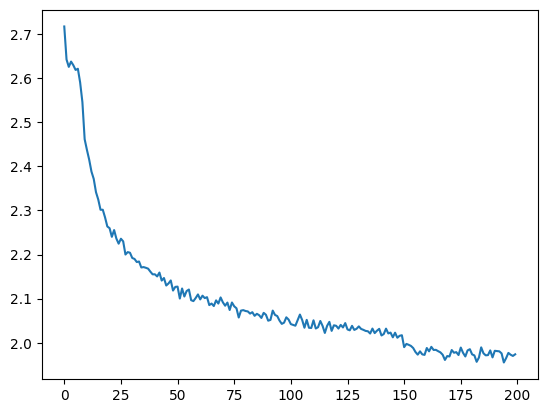

In [90]:
mean_losses = torch.tensor(lossi).view(200, -1).mean(1)
plt.plot(mean_losses)

In [91]:
@torch.no_grad()
def split_loss(split):
  x, y = {
      'train': (Xtr, Ytr),
      'val': (Xdev, Ydev),
      'test': (Xte, Yte)
  }[split]

  logits = model(x)

  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.9426138401031494
val 2.0266759395599365


|                                                                | Train loss        | Val loss           |
|----------------------------------------------------------------|-------------------|--------------------|
| Original (3 character context, 200 hidden neurons, 12k params) | 2.058861494064331 | 2.1029791831970215 |
| Context 3 -> 8 (22k params)                                    | 1.910690426826477 | 2.0259077548980713 |
| Flat -> Hierarchical (22k params)                                    | 1.9718620777130127 | 2.0393052101135254 |
| Fix bug in batchnorm (22k params)                                    | 1.9426138401031494 | 2.0266759395599365 |